<>:9: SyntaxWarning: invalid escape sequence '\V'
<>:11: SyntaxWarning: invalid escape sequence '\F'
<>:13: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\V'
<>:11: SyntaxWarning: invalid escape sequence '\F'
<>:13: SyntaxWarning: invalid escape sequence '\A'
C:\Users\tchoudhury\AppData\Local\Temp\ipykernel_15304\3699349236.py:9: SyntaxWarning: invalid escape sequence '\V'
  with open('results_50\VGGFace_ControlFace.yaml', 'r') as f:
C:\Users\tchoudhury\AppData\Local\Temp\ipykernel_15304\3699349236.py:11: SyntaxWarning: invalid escape sequence '\F'
  with open('results_50\Facenet_ControlFace.yaml', 'r') as f:
C:\Users\tchoudhury\AppData\Local\Temp\ipykernel_15304\3699349236.py:13: SyntaxWarning: invalid escape sequence '\A'
  with open('results_50\ArcFace_ControlFace.yaml', 'r') as f:


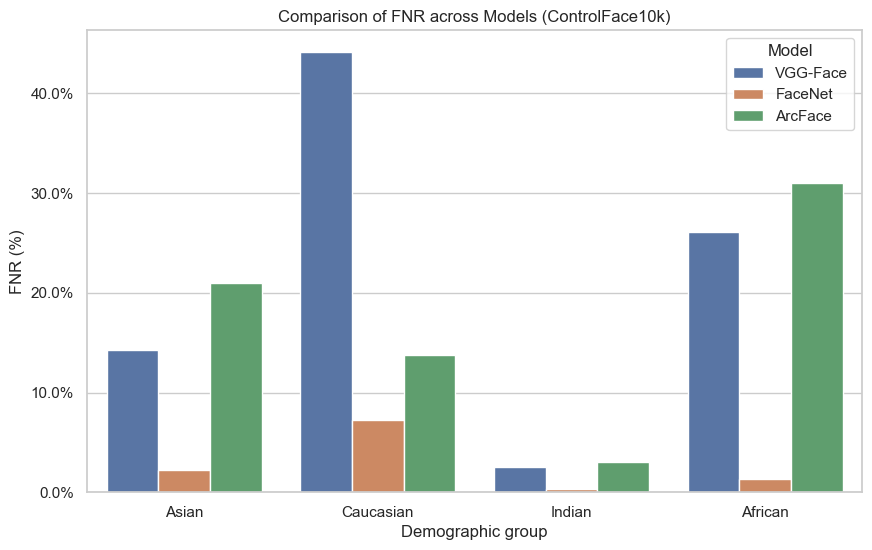

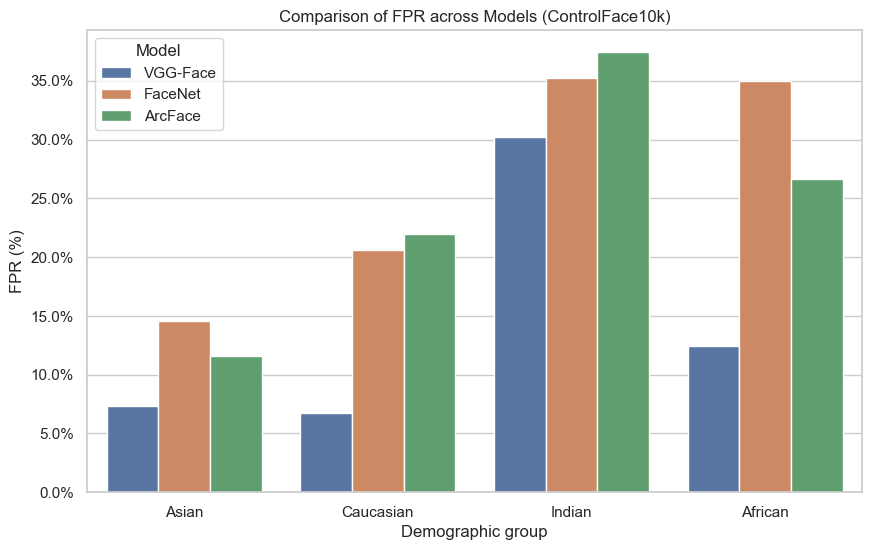

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import pandas as pd
from matplotlib.ticker import PercentFormatter


# Load YAML files
with open('results_50\VGGFace_ControlFace.yaml', 'r') as f:
    model1_data = yaml.safe_load(f)
with open('results_50\Facenet_ControlFace.yaml', 'r') as f:
    model2_data = yaml.safe_load(f)
with open('results_50\ArcFace_ControlFace.yaml', 'r') as f:
    model3_data = yaml.safe_load(f)

# Parse over YAML file
def extract_metric(data, metric):
    extracted = {}
    for entry in data:
        if entry['metric'] == metric:
            dataset = entry['dataset'].split('\\')[-1].capitalize()
            extracted[dataset] = entry['value'] * 100 
    return extracted

# Extract data
models = ['VGG-Face', 'FaceNet', 'ArcFace']
fnr_data = [
    extract_metric(model1_data, 'FNR'),
    extract_metric(model2_data, 'FNR'),
    extract_metric(model3_data, 'FNR')
]
fpr_data = [
    extract_metric(model1_data, 'FPR'),
    extract_metric(model2_data, 'FPR'),
    extract_metric(model3_data, 'FPR')
]

datasets = ['Asian', 'Caucasian', 'Indian', 'African']

# Convert to DataFrame for Seaborn
def prepare_dataframe(data, metric_name):
    rows = []
    for idx, model in enumerate(models):
        for dataset in datasets:
            rows.append({
                'Demographic group': dataset,
                'Model': model,
                metric_name: data[idx][dataset]
            })
    return pd.DataFrame(rows)

# Prepare dataframes
fnr_df = prepare_dataframe(fnr_data, 'FNR')
fpr_df = prepare_dataframe(fpr_data, 'FPR')

sns.set(style="whitegrid")

# Plot FNR
plt.figure(figsize=(10,6))
sns.barplot(data=fnr_df, x='Demographic group', y='FNR', hue='Model')
plt.title('Comparison of FNR across Models (ControlFace10k)')
plt.ylabel('FNR (%)')
plt.legend(title='Model')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.show()

# Plot FPR
plt.figure(figsize=(10,6))
sns.barplot(data=fpr_df, x='Demographic group', y='FPR', hue='Model')
plt.title('Comparison of FPR across Models (ControlFace10k)')
plt.ylabel('FPR (%)')
plt.legend(title='Model')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\V'
<>:10: SyntaxWarning: invalid escape sequence '\F'
<>:12: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\V'
<>:10: SyntaxWarning: invalid escape sequence '\F'
<>:12: SyntaxWarning: invalid escape sequence '\A'
C:\Users\tchoudhury\AppData\Local\Temp\ipykernel_12376\22663426.py:8: SyntaxWarning: invalid escape sequence '\V'
  with open('results_synthpar\VGGFace_100.yaml', 'r') as f:
C:\Users\tchoudhury\AppData\Local\Temp\ipykernel_12376\22663426.py:10: SyntaxWarning: invalid escape sequence '\F'
  with open('results_synthpar\Facenet_100.yaml', 'r') as f:
C:\Users\tchoudhury\AppData\Local\Temp\ipykernel_12376\22663426.py:12: SyntaxWarning: invalid escape sequence '\A'
  with open('results_synthpar\ArcFace_100.yaml', 'r') as f:


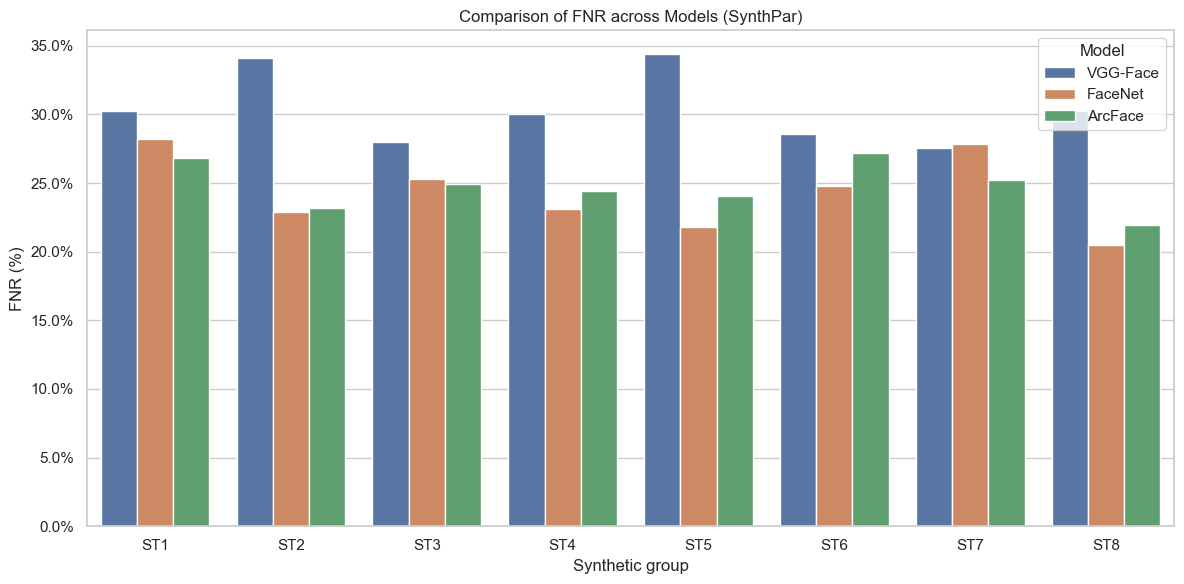

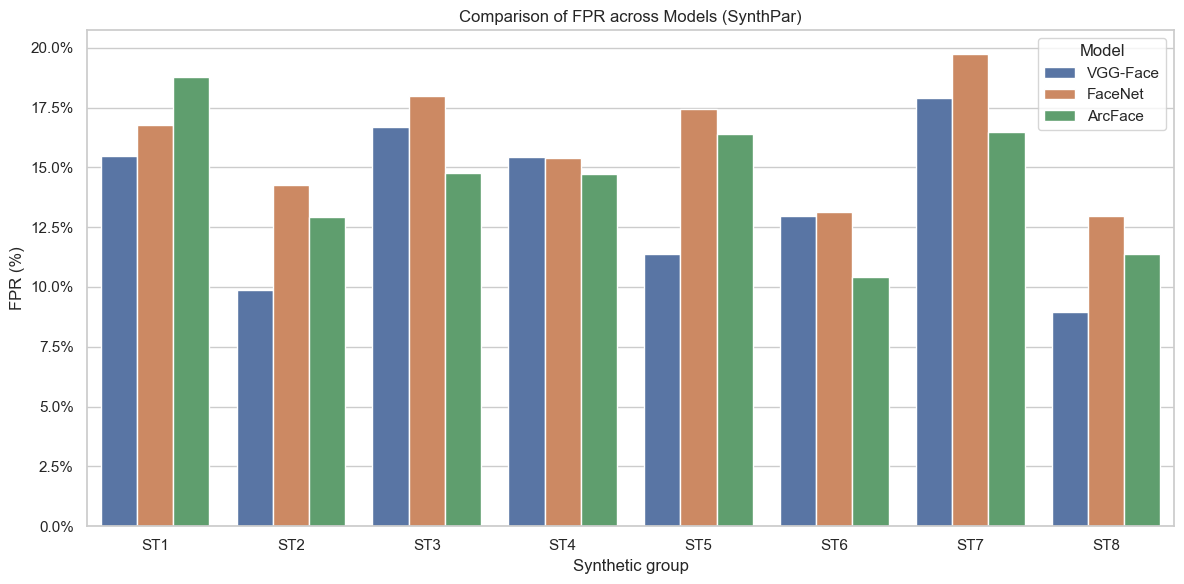

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import pandas as pd
from matplotlib.ticker import PercentFormatter

# Load YAML files
with open('results_synthpar\VGGFace_100.yaml', 'r') as f:
    model1_data = yaml.safe_load(f)
with open('results_synthpar\Facenet_100.yaml', 'r') as f:
    model2_data = yaml.safe_load(f)
with open('results_synthpar\ArcFace_100.yaml', 'r') as f:
    model3_data = yaml.safe_load(f)

# Parse over YAML file
def extract_metric(data, metric):
    extracted = {}
    for entry in data:
        if entry['metric'] == metric:
            dataset = entry['dataset'].split('\\')[-1].upper()  # Extract "ST1", "ST2", ...
            extracted[dataset] = entry['value'] * 100
    return extracted

# Extract data
models = ['VGG-Face', 'FaceNet', 'ArcFace']
fnr_data = [
    extract_metric(model1_data, 'FNR'),
    extract_metric(model2_data, 'FNR'),
    extract_metric(model3_data, 'FNR')
]
fpr_data = [
    extract_metric(model1_data, 'FPR'),
    extract_metric(model2_data, 'FPR'),
    extract_metric(model3_data, 'FPR')
]

# Get dataset names dynamically from the keys of any extract result
datasets = sorted(set(fnr_data[0].keys()) | set(fpr_data[0].keys()))

# Convert to DataFrame for Seaborn
def prepare_dataframe(data, metric_name):
    rows = []
    for idx, model in enumerate(models):
        for dataset in datasets:
            rows.append({
                'Synthetic group': dataset,
                'Model': model,
                metric_name: data[idx].get(dataset, 0.0)
            })
    return pd.DataFrame(rows)

# Prepare dataframes
fnr_df = prepare_dataframe(fnr_data, 'FNR')
fpr_df = prepare_dataframe(fpr_data, 'FPR')

sns.set(style="whitegrid")

# Plot FNR
plt.figure(figsize=(12, 6))
sns.barplot(data=fnr_df, x='Synthetic group', y='FNR', hue='Model')
plt.title('Comparison of FNR across Models (SynthPar)')
plt.ylabel('FNR (%)')
plt.legend(title='Model')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

# Plot FPR
plt.figure(figsize=(12, 6))
sns.barplot(data=fpr_df, x='Synthetic group', y='FPR', hue='Model')
plt.title('Comparison of FPR across Models (SynthPar)')
plt.ylabel('FPR (%)')
plt.legend(title='Model')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()